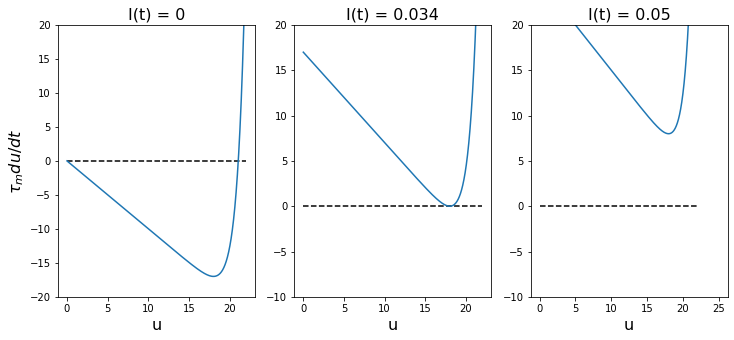

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def exponential(u,dt,v_rh,R,I):
    taudu = -u+dt*np.exp((u-v_rh)/dt)+R*I
    return(taudu)

#R = 500MΩ,  ηrh = 18mV, ∆T = 1mV 

u  = np.arange(0,22,0.0001)
u2 = np.arange(0,25,0.0001)
du1 = np.zeros(len(u))
du2 = np.zeros(len(u))
du3 = np.zeros(len(u2))
for i in range(len(u)):
    du1[i] = exponential(u = u[i], dt = 1, v_rh = 18, R = 500, I = 0)
    du2[i] = exponential(u = u[i], dt = 1, v_rh = 18, R = 500, I = 0.034)
for i in range(len(u2)):
    du3[i] = exponential(u = u2[i], dt = 1, v_rh = 18, R = 500, I = 0.05) 
    
plt.figure(figsize=(12, 5))    
plt.subplot(1, 3, 1)
plt.plot(u, du1);
plt.ylim(-20,20)
plt.hlines(0,0,22,linestyles='dashed');
plt.ylabel('$τ_mdu/dt$', fontsize=16);
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0', fontsize=16)

plt.subplot(1, 3, 2)
plt.plot(u, du2);
plt.ylim(-10,20)
plt.hlines(0,0,22,linestyles='dashed');
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0.034', fontsize=16)

plt.subplot(1, 3, 3)
plt.plot(u2, du3);
plt.ylim(-10,20)
plt.hlines(0,0,22,linestyles='dashed');
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0.05', fontsize=16);

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import isclose
T = 1500000
h = 0.000001
U= np.zeros(T)
U1= np.zeros(T)
U2= np.zeros(T)
dt = 1
v_rh = 18
R = 500
I = 1
for t in range(T-1):
    if (isclose(U[t], 50,abs_tol=20)):
        U[t] =0
    U[t+1] = U[t] + h*(-U[t]+dt*np.exp((U[t]-v_rh)/dt)+R*I)

I = 0.5
for t in range(T-1):
    if (isclose(U1[t], 50,abs_tol=20)):
        U1[t] =0
    U1[t+1] = U1[t] + h*(-U1[t]+dt*np.exp((U1[t]-v_rh)/dt)+R*I)

I = 0.1
for t in range(T-1):
    if (isclose(U2[t], 50,abs_tol=20)):
        U2[t] =0
    U2[t+1] = U2[t] + h*(-U2[t]+dt*np.exp((U2[t]-v_rh)/dt)+R*I)

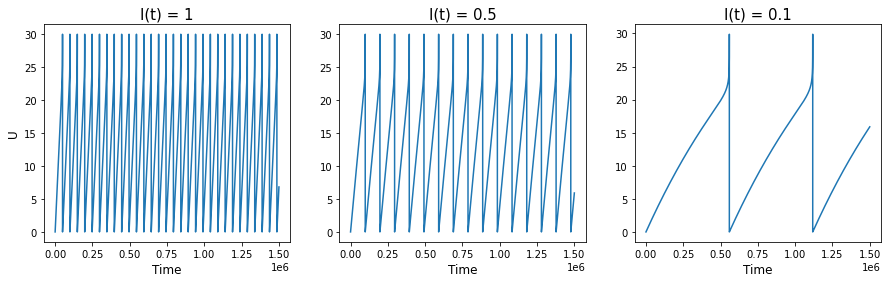

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.plot(U)
plt.title('I(t) = 1', fontsize = 15)
plt.ylabel('U', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.subplot(1, 3, 2)
plt.plot(U1)
plt.title('I(t) = 0.5', fontsize = 15)
plt.xlabel('Time', fontsize = 12)
plt.subplot(1, 3, 3)
plt.plot(U2)
plt.title('I(t) = 0.1', fontsize = 15)
plt.xlabel('Time', fontsize = 12);

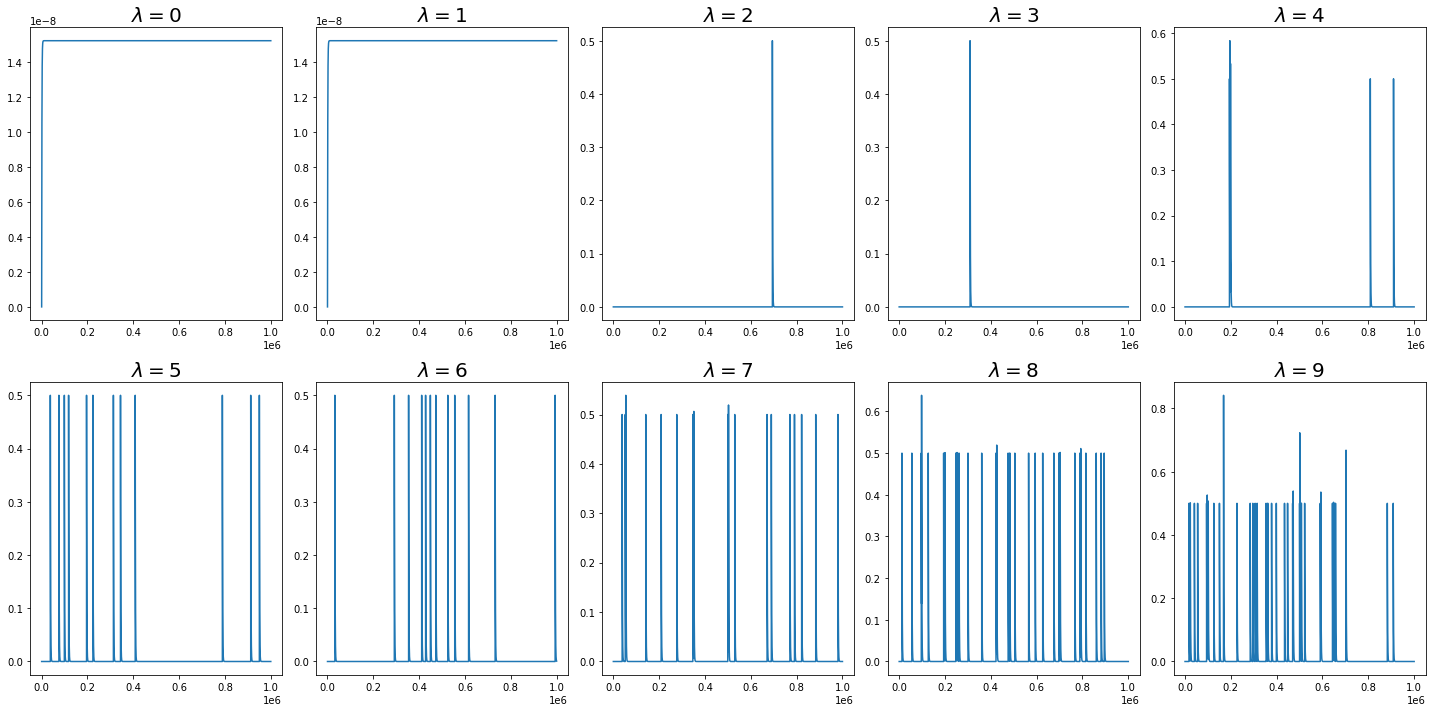

In [108]:
import numpy as np
from math import isclose
def input(x,h):
    return(np.random.poisson(lam = h*x))

dt=1
w = 1;
v_rh= 18;

T = 1000000
h = 0.001
U= np.zeros(T)
record =[]
xv = np.arange(0,10)

fig, axs = plt.subplots(2,5, figsize=(20, 10))
fig.tight_layout()

axs = axs.ravel()

for j in range(len(xv)):
    x = xv[j]
    for t in range(T-1):           
        if input(x,h) > 1:
            U[t+1] = U[t]+0.5  
            record.append(t)
        else:
            U[t+1] = U[t] + h*(-U[t]+dt*np.exp((U[t]-v_rh)/dt))
    axs[j].set_title('$\lambda=$%i' %j, fontsize =20)
    axs[j].plot(U)
    fig.tight_layout()
    
    



    
